In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Gulim'

In [ ]:
%pwd

'c:\\Users\\lks40\\Desktop\\Python\\수집된 데이터\\배경'

In [ ]:
df_travel = pd.read_csv('c:\\Users\\lks40\\Desktop\\Python\\수집된 데이터\\배경/여행지 선호도 조사.csv',encoding ='cp949')
df_reason = pd.read_csv('c:\\Users\\lks40\\Desktop\\Python\\수집된 데이터\\배경/제주도 선정 이유.csv',encoding ='cp949')

In [ ]:
df_travel.head(3)

,전체,컬럼별,사례수,처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토
0,권역,서울/경인권,674,66.8,17.5,15.7
1,권역,경상권,170,76.5,7.6,15.9
2,권역,호남권,72,61.1,19.4,19.4


In [ ]:
df_travel.columns

Index(['전체', '컬럼별', '사례수', '처음부터 제주 선택', '해외여행 검토', '국내 다른 지역 검토'], dtype='object')

In [ ]:
df_reason.head(3)

,전체,컬럼별,사례수,다른 지역 대비 전염병 안전지역이라고 생각해서,청정한 자연환경을 느끼고 싶어서,"이동 거리가 적당해서(물리적, 시간적 거리)",여행 비용이 적당해서,"관광 편의성이 높아서(숙박, 교통 등)",실외 관광활동이 다양해서,해외여행 대체지로 적절해서,기타
0,권역,서울/경인권,674,11.1,46.7,11.1,4.3,9.1,3.6,13.6,0.4
1,권역,경상권,170,11.8,39.4,12.9,5.3,10.6,4.1,15.9,0.0
2,권역,호남권,72,9.7,40.3,20.8,4.2,5.6,4.2,13.9,1.4


In [ ]:
df_reason.columns

Index(['전체', '컬럼별', '사례수', '다른 지역 대비 전염병 안전지역이라고 생각해서', '청정한 자연환경을 느끼고 싶어서',
       '이동 거리가 적당해서(물리적, 시간적 거리)', '여행 비용이 적당해서', '관광 편의성이 높아서(숙박, 교통 등)',
       '실외 관광활동이 다양해서', '해외여행 대체지로 적절해서', '기타'],
      dtype='object')

In [ ]:
df_reason.columns = ['전체','컬럼별', '사례수',"전염안전지역","청정 자연환경","이동거리","여행비용","관광편의성","실외관광활동","해외여행대체","기타"]

In [ ]:
df_reason.columns

Index(['전체', '컬럼별', '사례수', '전염안전지역', '청정 자연환경', '이동거리', '여행비용', '관광편의성',
       '실외관광활동', '해외여행대체', '기타'],
      dtype='object')

## 여행지 선호도 

In [ ]:
df_travel.head(3)

,전체,컬럼별,사례수,처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토
0,권역,서울/경인권,674,66.8,17.5,15.7
1,권역,경상권,170,76.5,7.6,15.9
2,권역,호남권,72,61.1,19.4,19.4


In [ ]:
df_travel_sector = df_travel.iloc[:20,]
df_travel_sector = df_travel_sector.drop(['사례수'],axis=1)

### 권역별 여행지 선호도 데이터

In [ ]:
df_travel_area = df_travel_sector[df_travel_sector['전체']=='권역']
df_travel_area = df_travel_area.drop(['전체'],axis=1)
df_travel_area.columns = ['권역', '처음부터 제주 선택', '해외여행 검토', '국내 다른 지역 검토']
df_travel_area = df_travel_area.reset_index(drop=True)
df_travel_area

,권역,처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토
0,서울/경인권,66.8,17.5,15.7
1,경상권,76.5,7.6,15.9
2,호남권,61.1,19.4,19.4
3,충청/강원권,60.7,23.8,15.5


### 계획월별 여행지 선호도 데이터

In [ ]:
df_travel_month = df_travel_sector[df_travel_sector['전체']=='제주여행 계획월']
df_travel_month = df_travel_month.drop(['전체'],axis=1)
df_travel_month.columns = ['계획 월', '처음부터 제주 선택', '해외여행 검토', '국내 다른 지역 검토']
df_travel_month = df_travel_month.reset_index(drop=True)
df_travel_month

,계획 월,처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토
0,7월,71.0,15.5,13.5
1,8월,66.0,16.9,17.1


### 성별별 여행지 선호도 데이터

In [ ]:
df_travel_sex = df_travel_sector[df_travel_sector['전체']=='성별']
df_travel_sex = df_travel_sex.drop(['전체'],axis=1)
df_travel_sex.columns = ['성별', '처음부터 제주 선택', '해외여행 검토', '국내 다른 지역 검토']
df_travel_sex = df_travel_sex.reset_index(drop=True)
df_travel_sex

,성별,처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토
0,남자,63.6,20.7,15.7
1,여자,72.9,10.7,16.4


### 연령별 여행지 선호도 데이터

In [ ]:
df_travel_age = df_travel_sector[df_travel_sector['전체']=='연령']
df_travel_age = df_travel_age.drop(['전체'],axis=1)
df_travel_age.columns = ['연령', '처음부터 제주 선택', '해외여행 검토', '국내 다른 지역 검토']
df_travel_age = df_travel_age.reset_index(drop=True)
df_travel_age

,연령,처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토
0,15~20세,57.6,24.2,18.2
1,21~30세,72.5,13.1,14.4
2,31~40세,72.3,16.2,11.5
3,41~50세,66.0,16.2,17.8
4,51~60세,61.3,16.1,22.6
5,61세 이상,62.1,24.2,13.6


### 직업별 여행지 선호도 데이터

In [ ]:
df_travel_job = df_travel_sector[df_travel_sector['전체']=='직업']
df_travel_job = df_travel_job.drop(['전체'],axis=1)
df_travel_job.columns = ['직업', '처음부터 제주 선택', '해외여행 검토', '국내 다른 지역 검토']
df_travel_job = df_travel_job.reset_index(drop=True)
df_travel_job

,직업,처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토
0,학생,64.6,16.9,18.5
1,사무/전문직,65.9,17.6,16.4
2,판매/기술직,76.4,15.1,8.5
3,자영업,61.0,18.6,20.3
4,전업주부,79.2,6.5,14.3
5,기타(무직 등),60.0,16.7,23.3


## 제주도 선정 이유

In [ ]:
df_reason_sector = df_reason.iloc[:20,]
df_reason_sector = df_reason_sector.drop(['사례수'],axis=1)

### 권역별 제주도 선정 이유 데이터

In [ ]:
df_reason_area = df_reason_sector[df_reason_sector['전체']=='권역']
df_reason_area = df_reason_area.drop(['전체'],axis=1)
df_reason_area.columns = ['권역',"전염안전지역","청정 자연환경","이동거리","여행비용","관광편의성","실외관광활동","해외여행대체","기타"]
df_reason_area = df_reason_area.reset_index(drop=True)
df_reason_area

,권역,전염안전지역,청정 자연환경,이동거리,여행비용,관광편의성,실외관광활동,해외여행대체,기타
0,서울/경인권,11.1,46.7,11.1,4.3,9.1,3.6,13.6,0.4
1,경상권,11.8,39.4,12.9,5.3,10.6,4.1,15.9,0.0
2,호남권,9.7,40.3,20.8,4.2,5.6,4.2,13.9,1.4
3,충청/강원권,8.3,47.6,11.9,4.8,8.3,3.6,13.1,2.4


### 계획월별 제주도 선정 이유 데이터

In [ ]:
df_reason_month = df_reason_sector[df_reason_sector['전체']=='제주여행 계획월']
df_reason_month = df_reason_month.drop(['전체'],axis=1)
df_reason_month.columns = ['계획 월',"전염안전지역","청정 자연환경","이동거리","여행비용","관광편의성","실외관광활동","해외여행대체","기타"]
df_reason_month = df_reason_month.reset_index(drop=True)
df_reason_month

,계획 월,전염안전지역,청정 자연환경,이동거리,여행비용,관광편의성,실외관광활동,해외여행대체,기타
0,7월,15.5,43.6,14.9,5.3,6.6,4.0,10.2,0.0
1,8월,8.9,45.8,11.0,4.2,10.0,3.6,15.6,0.9


### 성별별 제주도 선정 이유 데이터

In [ ]:
df_reason_sex = df_reason_sector[df_reason_sector['전체']=='성별']
df_reason_sex = df_reason_sex.drop(['전체'],axis=1)
df_reason_sex.columns = ['성별',"전염안전지역","청정 자연환경","이동거리","여행비용","관광편의성","실외관광활동","해외여행대체","기타"]
df_reason_sex = df_reason_sex.reset_index(drop=True)
df_reason_sex

,성별,전염안전지역,청정 자연환경,이동거리,여행비용,관광편의성,실외관광활동,해외여행대체,기타
0,남자,9.8,44.1,12.4,5.5,9.7,4.0,13.8,0.7
1,여자,12.4,46.4,11.9,3.1,8.1,3.3,14.3,0.5


### 연령별 제주도 선정 이유 데이터

In [ ]:
df_reason_age = df_reason_sector[df_reason_sector['전체']=='연령']
df_reason_age = df_reason_age.drop(['전체'],axis=1)
df_reason_age.columns = ['연령',"전염안전지역","청정 자연환경","이동거리","여행비용","관광편의성","실외관광활동","해외여행대체","기타"]
df_reason_age = df_reason_age.reset_index(drop=True)
df_reason_age

,연령,전염안전지역,청정 자연환경,이동거리,여행비용,관광편의성,실외관광활동,해외여행대체,기타
0,15~20세,18.2,42.4,15.2,12.1,3.0,3.0,3.0,3.0
1,21~30세,21.6,32.7,15.0,7.8,11.8,3.3,7.8,0.0
2,31~40세,12.6,48.9,11.9,4.3,6.8,2.2,12.6,0.7
3,41~50세,7.3,47.0,11.4,4.1,9.2,4.8,15.9,0.3
4,51~60세,5.8,45.2,11.0,2.6,10.3,5.2,19.4,0.6
5,61세 이상,4.5,50.0,12.1,0.0,10.6,3.0,18.2,1.5


### 직업별 제주도 선정 이유 데이터

In [ ]:
df_reason_job = df_reason_sector[df_reason_sector['전체']=='직업']
df_reason_job = df_reason_job.drop(['전체'],axis=1)
df_reason_job.columns = ['직업',"전염안전지역","청정 자연환경","이동거리","여행비용","관광편의성","실외관광활동","해외여행대체","기타"]
df_reason_job = df_reason_job.reset_index(drop=True)
df_reason_job

,직업,전염안전지역,청정 자연환경,이동거리,여행비용,관광편의성,실외관광활동,해외여행대체,기타
0,학생,12.3,43.1,13.8,9.2,9.2,6.2,4.6,1.5
1,사무/전문직,11.2,45.2,12.1,3.5,9.7,2.9,15.1,0.5
2,판매/기술직,11.3,44.3,13.2,9.4,6.6,2.8,11.3,0.9
3,자영업,15.3,37.3,11.9,5.1,8.5,6.8,15.3,0.0
4,전업주부,5.2,48.1,10.4,2.6,7.8,6.5,18.2,1.3
5,기타(무직 등),6.7,56.7,13.3,3.3,6.7,6.7,6.7,0.0


## 관광객의 여행지 선호도 시각화
* df_travel_area
* df_travel_month
* df_travel_sex
* df_travel_age
* df_travel_job

### 권역별 관광객 여행지 선호도 시각화

In [ ]:
df_travel_area

,권역,처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토
0,서울/경인권,66.8,17.5,15.7
1,경상권,76.5,7.6,15.9
2,호남권,61.1,19.4,19.4
3,충청/강원권,60.7,23.8,15.5


In [ ]:
df_travel_area_div = pd.pivot_table(df_travel_area, index =['권역'] ,values =['처음부터 제주 선택', '해외여행 검토', '국내 다른 지역 검토'], margins=True)
df_travel_area_div = df_travel_area_div.iloc[4,].to_frame()
df_travel_area_div = df_travel_area_div.sort_values(by='All',ascending=False)
df_travel_area_div = df_travel_area_div.transpose()
df_travel_area_div = round(df_travel_area_div,1)
df_travel_area_div

,처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토
All,66.3,17.1,16.6


In [ ]:
df_travel_area_trans = df_travel_area.transpose()
df_travel_area_trans.rename(columns=df_travel_area_trans.iloc[0],inplace=True)
df_travel_area_trans = df_travel_area_trans.drop(df_travel_area_trans.index[0])
df_travel_area_trans = df_travel_area_trans.reset_index()
df_travel_area_trans.columns = ['여행지선택', '서울/경기권','경상권','호남권','충청/강원권']
df_travel_area_trans = df_travel_area_trans.sort_values(by='서울/경기권',ascending=False)
df_travel_area_trans

,여행지선택,서울/경기권,경상권,호남권,충청/강원권
0,처음부터 제주 선택,66.8,76.5,61.1,60.7
1,해외여행 검토,17.5,7.6,19.4,23.8
2,국내 다른 지역 검토,15.7,15.9,19.4,15.5


C:\Users\lks40\AppData\Local\Temp\ipykernel_14496\1252730483.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_travel_area_div ,ci=None)


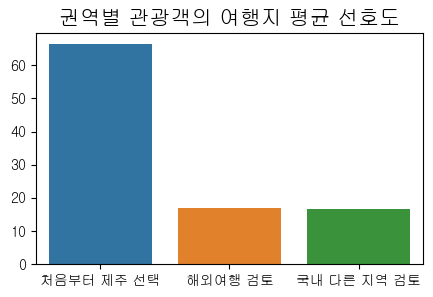

In [ ]:
plt.figure(figsize = (5, 3))
sns.barplot(data=df_travel_area_div ,ci=None)
plt.title('권역별 관광객의 여행지 평균 선호도', size=15)
plt.show()

* 코로나 시대 이후 관광객의 여행지 선택 중 '처음부터 제주 선택'이 1순위로 높아졌다.

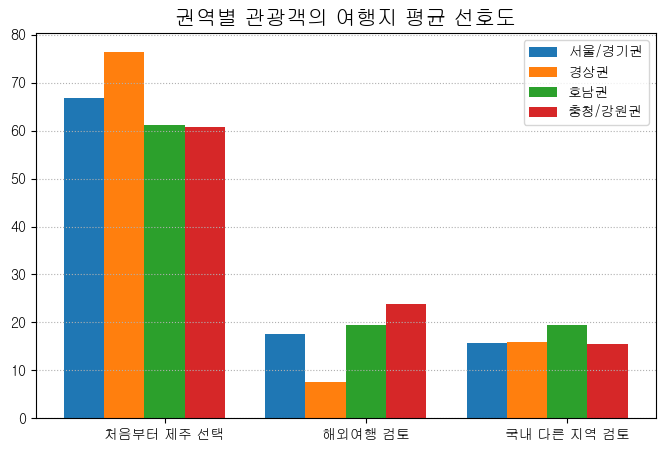

In [ ]:
w = 0.2
nrow = df_travel_area_trans.shape[0]
idx = np.arange(nrow)
idx

plt.figure(figsize = (8, 5))
plt.bar(idx - 2 * w,df_travel_area_trans['서울/경기권'], width=w, label='서울/경기권')
plt.bar(idx - w,df_travel_area_trans['경상권'], width=w, label='경상권')
plt.bar(idx ,df_travel_area_trans['호남권'], width=w, label='호남권')
plt.bar(idx + w,df_travel_area_trans['충청/강원권'], width=w, label='충청/강원권')
plt.title('권역별 관광객의 여행지 평균 선호도', size=15)
plt.xticks(idx, df_travel_area_trans['여행지선택'])
plt.legend()
plt.grid(axis='y', ls=':')
plt.show()

* 여행지 선택에 있어서 '처음부터 제주선택'은 경상권이 제일 높고, '해외여행 검토'는 충청/강원권이 높았고, <br>'국내 다른 지역 검토'는 호남권이 높다.

### 계획월별 관광객 여행지 선호도 시각화

In [ ]:
df_travel_month

,계획 월,처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토
0,7월,71.0,15.5,13.5
1,8월,66.0,16.9,17.1


In [ ]:
df_travel_month_div = pd.pivot_table(df_travel_month, index =['계획 월'] ,values =['처음부터 제주 선택', '해외여행 검토', '국내 다른 지역 검토'], margins=True)
df_travel_month_div = df_travel_month_div.iloc[2,].to_frame()
df_travel_month_div = df_travel_month_div.sort_values(by='All',ascending=False)
df_travel_month_div = df_travel_month_div.transpose()
df_travel_month_div = round(df_travel_month_div,1)
df_travel_month_div

,처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토
All,68.5,16.2,15.3


In [ ]:
df_travel_month_trans = df_travel_month.transpose()
df_travel_month_trans.rename(columns=df_travel_month_trans.iloc[0],inplace=True)
df_travel_month_trans = df_travel_month_trans.drop(df_travel_month_trans.index[0])
df_travel_month_trans = df_travel_month_trans.reset_index()
df_travel_month_trans.columns =['여행지선택', '7월', '8월']
df_travel_month_trans = df_travel_month_trans.sort_values(by='8월',ascending=False)
df_travel_month_trans

,여행지선택,7월,8월
0,처음부터 제주 선택,71.0,66.0
2,국내 다른 지역 검토,13.5,17.1
1,해외여행 검토,15.5,16.9


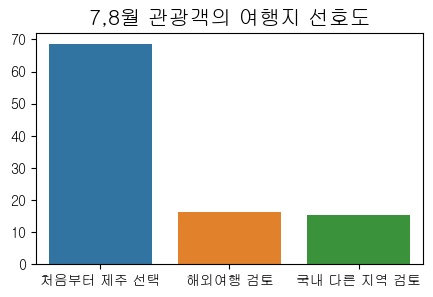

In [ ]:
plt.figure(figsize = (5, 3))
sns.barplot(data=df_travel_month_div ,errorbar=None)
plt.title('7,8월 관광객의 여행지 선호도', size=15)
plt.show()

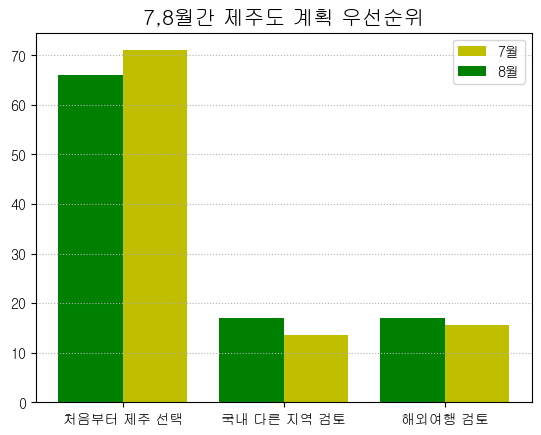

In [ ]:
plt.bar(df_travel_month_trans['여행지선택'],df_travel_month_trans['7월'], width=0.4, align='edge', label='7월', color='y')
plt.bar(df_travel_month_trans['여행지선택'],df_travel_month_trans['8월'], width=-0.4, align='edge',label='8월', color='g')
plt.title('7,8월간 제주도 계획 우선순위', size=15, fontweight='bold')
plt.grid(axis='y', ls=':')
plt.legend()
plt.show()

* '처음부터 제주 선택은' 7월 관광객들이 더 많이 선택했고, 나머지는 8월 관광객의 선택이 더 많다.

### 성별별 관광객 여행지 선호도 시각화

In [ ]:
df_travel_sex

,성별,처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토
0,남자,63.6,20.7,15.7
1,여자,72.9,10.7,16.4


In [ ]:
df_travel_sex_div = pd.pivot_table(df_travel_sex, index =['성별'] ,values =['처음부터 제주 선택', '해외여행 검토', '국내 다른 지역 검토'], margins=True)
df_travel_sex_div = df_travel_sex_div.iloc[2,].to_frame()
df_travel_sex_div = df_travel_sex_div.sort_values(by='All',ascending=False)
df_travel_sex_div = df_travel_sex_div.transpose()
df_travel_sex_div = round(df_travel_sex_div,1)
df_travel_sex_div

,처음부터 제주 선택,국내 다른 지역 검토,해외여행 검토
All,68.2,16.0,15.7


In [ ]:
df_travel_sex_trans = df_travel_sex.transpose()
df_travel_sex_trans.rename(columns=df_travel_sex_trans.iloc[0],inplace=True)
df_travel_sex_trans = df_travel_sex_trans.drop(df_travel_sex_trans.index[0])
df_travel_sex_trans = df_travel_sex_trans.reset_index()
df_travel_sex_trans.columns =['여행지선택', '남자', '여자']
df_travel_sex_trans = df_travel_sex_trans.sort_values(by='남자',ascending=False)
df_travel_sex_trans

,여행지선택,남자,여자
0,처음부터 제주 선택,63.6,72.9
1,해외여행 검토,20.7,10.7
2,국내 다른 지역 검토,15.7,16.4


C:\Users\lks40\AppData\Local\Temp\ipykernel_14496\1214658534.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_travel_sex_div ,ci=None)


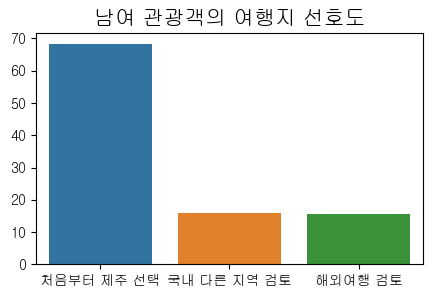

In [ ]:
plt.figure(figsize = (5, 3))
sns.barplot(data=df_travel_sex_div ,ci=None)
plt.title('남여 관광객의 여행지 선호도', size=15)
plt.show()

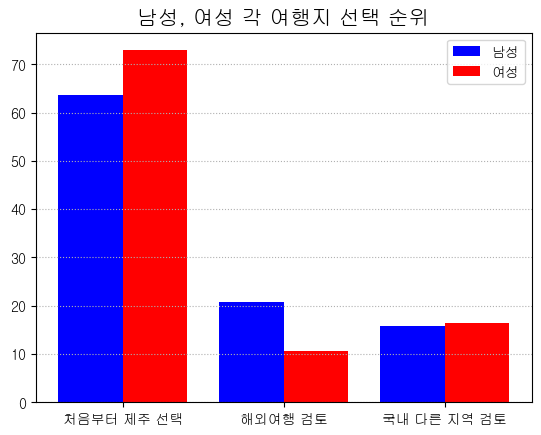

In [ ]:
plt.bar(df_travel_sex_trans['여행지선택'],df_travel_sex_trans['남자'], width=-0.4, align='edge', label='남성', color='b')
plt.bar(df_travel_sex_trans['여행지선택'],df_travel_sex_trans['여자'], width=0.4, align='edge',label='여성', color='r')
plt.title('남성, 여성 각 여행지 선택 순위', size=15, fontweight='bold')
plt.grid(axis='y', ls=':')
plt.legend()
plt.show()

* 1순위와 3순위는 여성이 높고, 2순위는 남성이 높다.

### 연령별 관광객 여행지 선호도 시각화

In [ ]:
df_travel_age

,연령,처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토
0,15~20세,57.6,24.2,18.2
1,21~30세,72.5,13.1,14.4
2,31~40세,72.3,16.2,11.5
3,41~50세,66.0,16.2,17.8
4,51~60세,61.3,16.1,22.6
5,61세 이상,62.1,24.2,13.6


In [ ]:
df_travel_age_div = pd.pivot_table(df_travel_age, index =['연령'] ,values =['처음부터 제주 선택', '해외여행 검토', '국내 다른 지역 검토'], margins=True)
df_travel_age_div = df_travel_age_div.iloc[6,].to_frame()
df_travel_age_div = df_travel_age_div.sort_values(by='All',ascending=False)
df_travel_age_div = df_travel_age_div.transpose()
df_travel_age_div = round(df_travel_age_div,1)
df_travel_age_div

,처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토
All,65.3,18.3,16.3


In [ ]:
df_travel_age_trans = df_travel_age.transpose()
df_travel_age_trans.rename(columns=df_travel_age_trans.iloc[0],inplace=True)
df_travel_age_trans = df_travel_age_trans.drop(df_travel_age_trans.index[0])
df_travel_age_trans = df_travel_age_trans.reset_index()
df_travel_age_trans.columns =['여행지선택', '10세 이상', '20세 이상', '30세 이상', '40세 이상', '50세 이상', '60세 이상']
df_travel_age_trans = df_travel_age_trans.sort_values(by='10세 이상',ascending=False)
df_travel_age_trans

,여행지선택,10세 이상,20세 이상,30세 이상,40세 이상,50세 이상,60세 이상
0,처음부터 제주 선택,57.6,72.5,72.3,66.0,61.3,62.1
1,해외여행 검토,24.2,13.1,16.2,16.2,16.1,24.2
2,국내 다른 지역 검토,18.2,14.4,11.5,17.8,22.6,13.6


C:\Users\lks40\AppData\Local\Temp\ipykernel_14496\4108991987.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_travel_age_div ,ci=None)


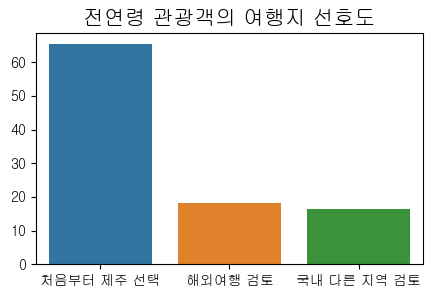

In [ ]:
plt.figure(figsize = (5, 3))
sns.barplot(data=df_travel_age_div ,ci=None)
plt.title('전연령 관광객의 여행지 선호도', size=15)
plt.show()

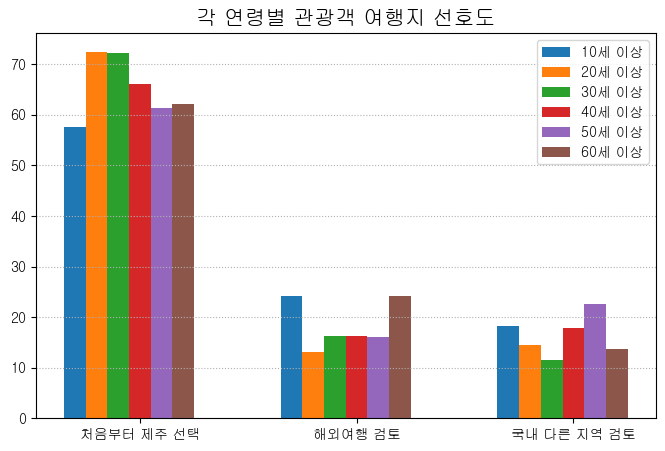

In [ ]:
w = 0.1
nrow = df_travel_age_trans.shape[0]
idx = np.arange(nrow)
idx

plt.figure(figsize = (8, 5))
plt.bar(idx - 3 * w, df_travel_age_trans['10세 이상'], width=w, label='10세 이상')
plt.bar(idx - 2 * w, df_travel_age_trans['20세 이상'], width=w, label='20세 이상')
plt.bar(idx - w, df_travel_age_trans['30세 이상'], width=w, label='30세 이상')
plt.bar(idx ,df_travel_age_trans['40세 이상'], width=w, label='40세 이상')
plt.bar(idx + w ,df_travel_age_trans['50세 이상'], width=w, label='50세 이상')
plt.bar(idx + 2 * w, df_travel_age_trans['60세 이상'], width=w, label='60세 이상')
plt.title('각 연령별 관광객 여행지 선호도', size=15)
plt.xticks(idx, df_travel_age_trans['여행지선택'])
plt.legend()
plt.grid(axis='y', ls=':')
plt.show()

* 20대와 30대가 '처음부터 제주선택'을 많이 선택하고, 10대와 60대가 '해외여행 검토'를 많이, 그리고<br> '국내 다른 지역 검토'는 50대가 많이 선택 했습니다.

### 직업별 관광객 여행지 선호도 시각화

In [ ]:
df_travel_job

,직업,처음부터 제주 선택,해외여행 검토,국내 다른 지역 검토
0,학생,64.6,16.9,18.5
1,사무/전문직,65.9,17.6,16.4
2,판매/기술직,76.4,15.1,8.5
3,자영업,61.0,18.6,20.3
4,전업주부,79.2,6.5,14.3
5,기타(무직 등),60.0,16.7,23.3


In [ ]:
df_travel_job_div = pd.pivot_table(df_travel_job, index =['직업'] ,values =['처음부터 제주 선택', '해외여행 검토', '국내 다른 지역 검토'], margins=True)
df_travel_job_div = df_travel_job_div.iloc[6,].to_frame()
df_travel_job_div = df_travel_job_div.sort_values(by='All',ascending=False)
df_travel_job_div = df_travel_job_div.transpose()
df_travel_job_div = round(df_travel_job_div,1)
df_travel_job_div

,처음부터 제주 선택,국내 다른 지역 검토,해외여행 검토
All,67.8,16.9,15.2


In [ ]:
df_travel_job_trans = df_travel_job.transpose()
df_travel_job_trans.rename(columns=df_travel_job_trans.iloc[0],inplace=True)
df_travel_job_trans = df_travel_job_trans.drop(df_travel_job_trans.index[0])
df_travel_job_trans = df_travel_job_trans.reset_index()
df_travel_job_trans.columns =['여행지선택', '학생', '사무/전문직', '판매/기술직', '자영업', '전업주부', '기타(무직 등)']
df_travel_job_trans = df_travel_job_trans.sort_values(by='자영업',ascending=False)
df_travel_job_trans

,여행지선택,학생,사무/전문직,판매/기술직,자영업,전업주부,기타(무직 등)
0,처음부터 제주 선택,64.6,65.9,76.4,61.0,79.2,60.0
2,국내 다른 지역 검토,18.5,16.4,8.5,20.3,14.3,23.3
1,해외여행 검토,16.9,17.6,15.1,18.6,6.5,16.7


C:\Users\lks40\AppData\Local\Temp\ipykernel_14496\2808791573.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_travel_job_div ,ci=None)


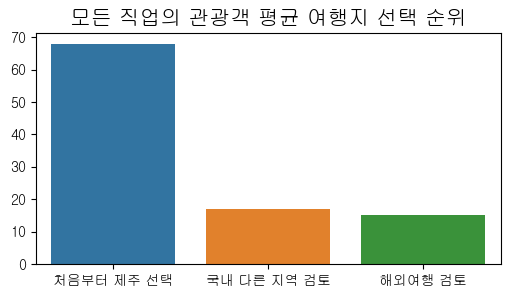

In [ ]:
plt.figure(figsize = (6, 3))
sns.barplot(data=df_travel_job_div ,ci=None)
plt.title('모든 직업의 관광객 평균 여행지 선택 순위', size=15)
plt.show()

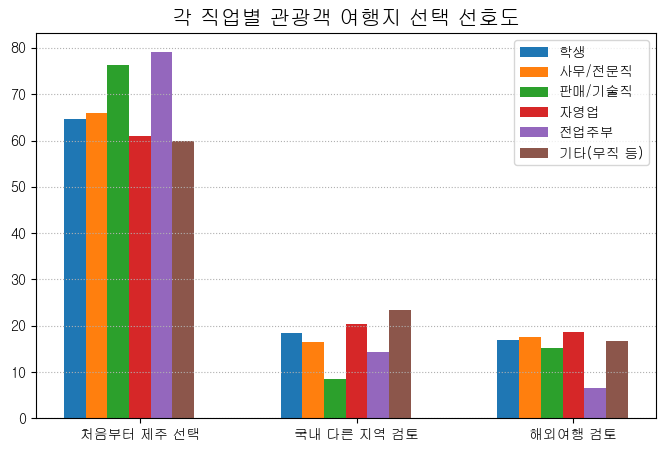

In [ ]:
w = 0.1
nrow = df_travel_job_trans.shape[0]
idx = np.arange(nrow)
idx

plt.figure(figsize = (8, 5))
plt.bar(idx - 3 * w, df_travel_job_trans['학생'], width=w, label='학생')
plt.bar(idx - 2 * w, df_travel_job_trans['사무/전문직'], width=w, label='사무/전문직')
plt.bar(idx - w, df_travel_job_trans['판매/기술직'], width=w, label='판매/기술직')
plt.bar(idx ,df_travel_job_trans['자영업'], width=w, label='자영업')
plt.bar(idx + w ,df_travel_job_trans['전업주부'], width=w, label='전업주부')
plt.bar(idx + 2 * w, df_travel_job_trans['기타(무직 등)'], width=w, label='기타(무직 등)')
plt.title('각 직업별 관광객 여행지 선택 선호도', size=15)
plt.xticks(idx, df_travel_job_trans['여행지선택'])
plt.legend()
plt.grid(axis='y', ls=':')
plt.show()

* 전업주부가 제일 많이 '처음부터 제주선택'을 많이하고, 2번째로 판매/기술직이 '처음부터 제주선택'을 선택했다.

## 제주도 선정 이유 시각화
* df_reason_area
* df_reason_month
* df_reason_sex
* df_reason_age
* df_reason_job

### 권역별 제주도 선정 이유 시각화

In [1]:
df_reason_area

NameError: ignored

In [ ]:
df_reason_area_div = pd.pivot_table(df_reason_area, index =['권역'] ,values =["전염안전지역","청정 자연환경","이동거리","여행비용","관광편의성","실외관광활동","해외여행대체","기타"], margins=True)
df_reason_area_div = df_reason_area_div.iloc[4,].to_frame()
df_reason_area_div = df_reason_area_div.sort_values(by='All',ascending=False)
df_reason_area_div = df_reason_area_div.transpose()
df_reason_area_div = round(df_reason_area_div,1)
df_reason_area_div

In [ ]:
df_reason_area_trans = df_reason_area.transpose()
df_reason_area_trans.rename(columns=df_reason_area_trans.iloc[0],inplace=True)
df_reason_area_trans = df_reason_area_trans.drop(df_reason_area_trans.index[0])
df_reason_area_trans = df_reason_area_trans.reset_index()
df_reason_area_trans.columns = ['제주도선택이유', '서울/경기권','경상권','호남권','충청/강원권']
df_reason_area_trans = df_reason_area_trans.sort_values(by='서울/경기권',ascending=False)
df_reason_area_trans

In [ ]:
plt.figure(figsize = (6, 3))
sns.barplot(data=df_reason_area_div ,errorbar=None)
plt.xticks(rotation=90)
plt.title('전국 관광객 평균 제주도 선택 이유 순위', size=15)

plt.show()

* '청정한 자연환경을 느끼고 싶은 이유'가 모든 이유 중 1순위이다.

In [ ]:
w = 0.2
nrow = df_reason_area_trans.shape[0]
idx = np.arange(nrow)
idx

plt.figure(figsize = (8, 5))
plt.bar(idx - 2 * w,df_reason_area_trans['서울/경기권'], width=w, label='서울/경기권')
plt.bar(idx - w,df_reason_area_trans['경상권'], width=w, label='경상권')
plt.bar(idx ,df_reason_area_trans['호남권'], width=w, label='호남권')
plt.bar(idx + w,df_reason_area_trans['충청/강원권'], width=w, label='충청/강원권')
plt.title('각 권역별 관광객 제주도 선택 이유 순위', size=15)
plt.xticks(idx, df_reason_area_trans['제주도선택이유'],rotation=90)
plt.legend()
plt.grid(axis='y', ls=':')
plt.show()

### 계획월별 제주도 선정 이유 시각화

In [ ]:
df_reason_month

,계획 월,전염안전지역,청정 자연환경,이동거리,여행비용,관광편의성,실외관광활동,해외여행대체,기타
0,7월,15.5,43.6,14.9,5.3,6.6,4.0,10.2,0.0
1,8월,8.9,45.8,11.0,4.2,10.0,3.6,15.6,0.9


In [ ]:
df_reason_month_div = pd.pivot_table(df_reason_month, index =['계획 월'] ,values =["전염안전지역","청정 자연환경","이동거리","여행비용","관광편의성","실외관광활동","해외여행대체","기타"
], margins=True)
df_reason_month_div = df_reason_month_div.iloc[2,].to_frame()
df_reason_month_div = df_reason_month_div.sort_values(by='All',ascending=False)
df_reason_month_div = df_reason_month_div.transpose()
df_reason_month_div = round(df_reason_month_div,1)
df_reason_month_div

,청정 자연환경,이동거리,해외여행대체,전염안전지역,관광편의성,여행비용,실외관광활동,기타
All,44.7,13.0,12.9,12.2,8.3,4.8,3.8,0.4


In [ ]:
df_reason_month_trans = df_reason_month.transpose()
df_reason_month_trans.rename(columns=df_reason_month_trans.iloc[0],inplace=True)
df_reason_month_trans = df_reason_month_trans.drop(df_reason_month_trans.index[0])
df_reason_month_trans = df_reason_month_trans.reset_index()
df_reason_month_trans.columns =['제주도선택이유', '7월', '8월']
df_reason_month_trans = df_reason_month_trans.sort_values(by='8월',ascending=False)
df_reason_month_trans

,제주도선택이유,7월,8월
1,청정 자연환경,43.6,45.8
6,해외여행대체,10.2,15.6
2,이동거리,14.9,11.0
4,관광편의성,6.6,10.0
0,전염안전지역,15.5,8.9
3,여행비용,5.3,4.2
5,실외관광활동,4.0,3.6
7,기타,0.0,0.9


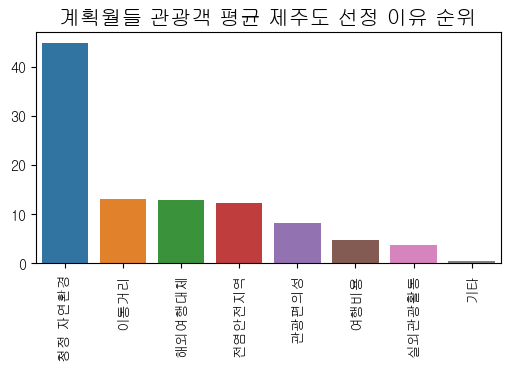

In [ ]:
plt.figure(figsize = (6, 3))
sns.barplot(data=df_reason_month_div ,errorbar=None)
plt.xticks(rotation=90)
plt.title('계획월들 관광객 평균 제주도 선정 이유 순위', size=15)
plt.show()

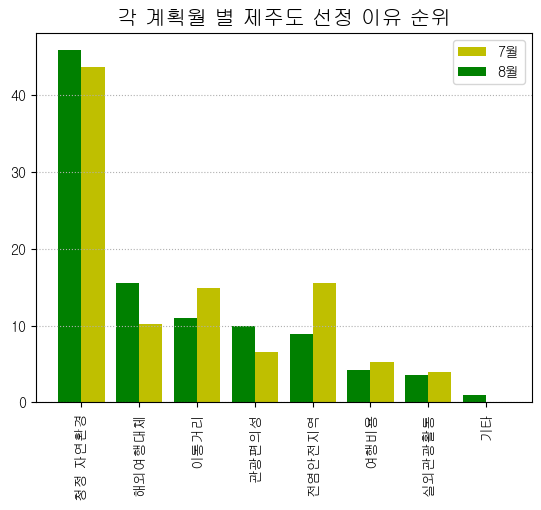

In [ ]:
plt.bar(df_reason_month_trans['제주도선택이유'],df_reason_month_trans['7월'], width=0.4, align='edge', label='7월', color='y')
plt.bar(df_reason_month_trans['제주도선택이유'],df_reason_month_trans['8월'], width=-0.4, align='edge',label='8월', color='g')
plt.title('각 계획월 별 제주도 선정 이유 순위', size=15, fontweight='bold')
plt.xticks(rotation=90)
plt.grid(axis='y', ls=':')
plt.legend()
plt.show()

* 8월의 관광객이 1,2,4순위의 응답이 더 많았고, 3 순위와 5 순위는 7월 관광객의 응답이 더 많았다.

### 성별별 제주도 선정 이유 시각화

In [ ]:
df_reason_sex

,성별,전염안전지역,청정 자연환경,이동거리,여행비용,관광편의성,실외관광활동,해외여행대체,기타
0,남자,9.8,44.1,12.4,5.5,9.7,4.0,13.8,0.7
1,여자,12.4,46.4,11.9,3.1,8.1,3.3,14.3,0.5


In [ ]:
df_reason_sex_div = pd.pivot_table(df_reason_sex, index =['성별'] ,values =["전염안전지역","청정 자연환경","이동거리","여행비용","관광편의성","실외관광활동","해외여행대체","기타"
], margins=True)
df_reason_sex_div = df_reason_sex_div.iloc[2,].to_frame()
df_reason_sex_div = df_reason_sex_div.sort_values(by='All',ascending=False)
df_reason_sex_div = df_reason_sex_div.transpose()
df_reason_sex_div = round(df_reason_sex_div,1)
df_reason_sex_div

,청정 자연환경,해외여행대체,이동거리,전염안전지역,관광편의성,여행비용,실외관광활동,기타
All,45.2,14.0,12.2,11.1,8.9,4.3,3.6,0.6


In [ ]:
df_reason_sex_trans = df_reason_sex.transpose()
df_reason_sex_trans.rename(columns=df_reason_sex_trans.iloc[0],inplace=True)
df_reason_sex_trans = df_reason_sex_trans.drop(df_reason_sex_trans.index[0])
df_reason_sex_trans = df_reason_sex_trans.reset_index()
df_reason_sex_trans.columns =['제주도선택이유', '남자', '여자']
df_reason_sex_trans = df_reason_sex_trans.sort_values(by='남자',ascending=False)
df_reason_sex_trans

,제주도선택이유,남자,여자
1,청정 자연환경,44.1,46.4
6,해외여행대체,13.8,14.3
2,이동거리,12.4,11.9
0,전염안전지역,9.8,12.4
4,관광편의성,9.7,8.1
3,여행비용,5.5,3.1
5,실외관광활동,4.0,3.3
7,기타,0.7,0.5


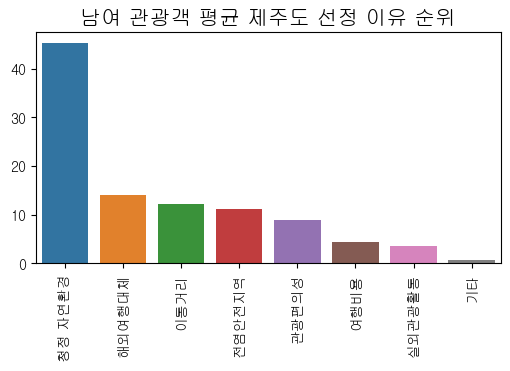

In [ ]:
plt.figure(figsize = (6, 3))
sns.barplot(data=df_reason_sex_div ,errorbar=None)
plt.xticks(rotation=90)
plt.title('남여 관광객 평균 제주도 선정 이유 순위', size=15)
plt.show()

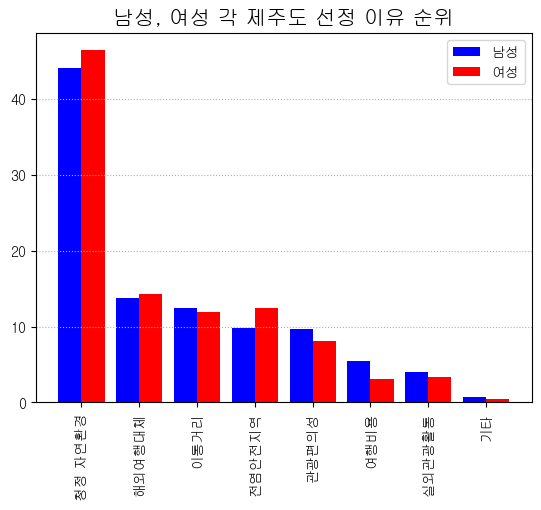

In [ ]:
plt.bar(df_reason_sex_trans['제주도선택이유'],df_reason_sex_trans['남자'], width=-0.4, align='edge', label='남성', color='b')
plt.bar(df_reason_sex_trans['제주도선택이유'],df_reason_sex_trans['여자'], width=0.4, align='edge',label='여성', color='r')
plt.title('남성, 여성 각 제주도 선정 이유 순위', size=15, fontweight='bold')
plt.xticks(rotation=90)
plt.grid(axis='y', ls=':')
plt.legend()
plt.show()

* 제주도 선정 이유 순위 1~4 순위까지는 여성이 높고, 나머지는 남성이 높다.

### 연령별 제주도 선정 이유 시각화

In [ ]:
df_reason_age

,연령,전염안전지역,청정 자연환경,이동거리,여행비용,관광편의성,실외관광활동,해외여행대체,기타
0,15~20세,18.2,42.4,15.2,12.1,3.0,3.0,3.0,3.0
1,21~30세,21.6,32.7,15.0,7.8,11.8,3.3,7.8,0.0
2,31~40세,12.6,48.9,11.9,4.3,6.8,2.2,12.6,0.7
3,41~50세,7.3,47.0,11.4,4.1,9.2,4.8,15.9,0.3
4,51~60세,5.8,45.2,11.0,2.6,10.3,5.2,19.4,0.6
5,61세 이상,4.5,50.0,12.1,0.0,10.6,3.0,18.2,1.5


In [ ]:
df_reason_age_div = pd.pivot_table(df_reason_age, index =['연령'] ,values =["전염안전지역","청정 자연환경","이동거리","여행비용","관광편의성","실외관광활동","해외여행대체","기타"
], margins=True)
df_reason_age_div = df_reason_age_div.iloc[6,].to_frame()
df_reason_age_div = df_reason_age_div.sort_values(by='All',ascending=False)
df_reason_age_div = df_reason_age_div.transpose()
df_reason_age_div.columns = ["청정 자연환경","전염안전지역","이동거리","관광편의성","여행비용","해외여행대체","실외관광활동","기타"]
df_reason_age_div = round(df_reason_age_div,1)
df_reason_age_div

,청정 자연환경,전염안전지역,이동거리,관광편의성,여행비용,해외여행대체,실외관광활동,기타
All,44.4,12.8,12.8,11.7,8.6,5.1,3.6,1.0


In [ ]:
df_reason_age_trans = df_reason_age.transpose()
df_reason_age_trans.rename(columns=df_reason_age_trans.iloc[0],inplace=True)
df_reason_age_trans = df_reason_age_trans.drop(df_reason_age_trans.index[0])
df_reason_age_trans = df_reason_age_trans.reset_index()
df_reason_age_trans.columns =['제주도 선정 이유', '10세 이상', '20세 이상', '30세 이상', '40세 이상', '50세 이상', '60세 이상']
df_reason_age_trans = df_reason_age_trans.sort_values(by='20세 이상',ascending=False)
df_reason_age_trans["제주도 선정 이유"] = ["청정 자연환경","전염안전지역","이동거리","관광편의성","여행비용","해외여행대체","실외관광활동","기타"]
df_reason_age_trans

,제주도 선정 이유,10세 이상,20세 이상,30세 이상,40세 이상,50세 이상,60세 이상
1,청정 자연환경,42.4,32.7,48.9,47.0,45.2,50.0
0,전염안전지역,18.2,21.6,12.6,7.3,5.8,4.5
2,이동거리,15.2,15.0,11.9,11.4,11.0,12.1
4,관광편의성,3.0,11.8,6.8,9.2,10.3,10.6
3,여행비용,12.1,7.8,4.3,4.1,2.6,0.0
6,해외여행대체,3.0,7.8,12.6,15.9,19.4,18.2
5,실외관광활동,3.0,3.3,2.2,4.8,5.2,3.0
7,기타,3.0,0.0,0.7,0.3,0.6,1.5


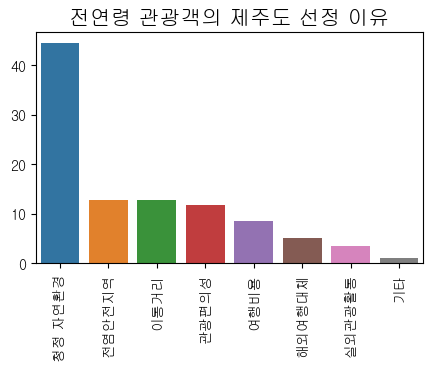

In [ ]:
plt.figure(figsize = (5, 3))
sns.barplot(data=df_reason_age_div ,errorbar=None)
plt.title('전연령 관광객의 제주도 선정 이유', size=15)
plt.xticks(rotation=90)
plt.show()

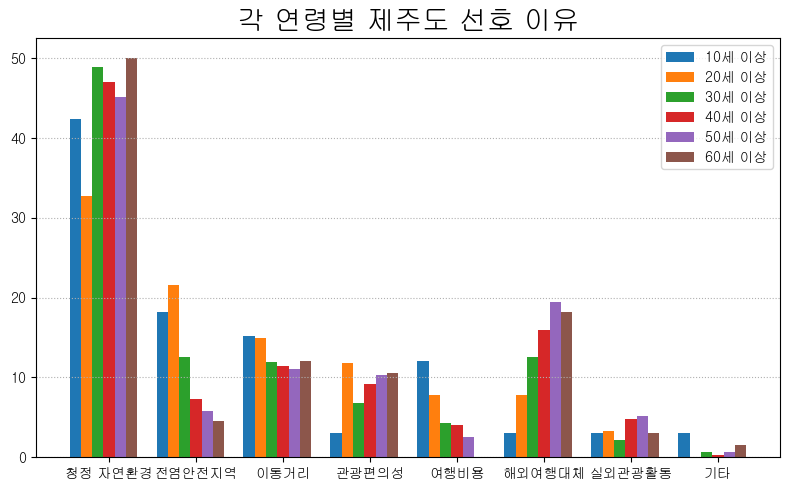

In [ ]:
w = 0.13
nrow = df_reason_age_trans.shape[0]
idx = np.arange(nrow)
idx

plt.figure(figsize = (8, 5))
plt.bar(idx - 3 * w, df_reason_age_trans['10세 이상'], width=w, label='10세 이상')
plt.bar(idx - 2 * w, df_reason_age_trans['20세 이상'], width=w, label='20세 이상')
plt.bar(idx - w, df_reason_age_trans['30세 이상'], width=w, label='30세 이상')
plt.bar(idx ,df_reason_age_trans['40세 이상'], width=w, label='40세 이상')
plt.bar(idx + w ,df_reason_age_trans['50세 이상'], width=w, label='50세 이상')
plt.bar(idx + 2 * w, df_reason_age_trans['60세 이상'], width=w, label='60세 이상')
plt.title('각 연령별 제주도 선호 이유', size=20)
plt.xticks(idx, df_reason_age_trans['제주도 선정 이유'],rotation=0)
plt.legend()
plt.grid(axis='y', ls=':')
plt.tight_layout()
plt.show()

* 1순위는 60세 이상, 2순위는 20세 이상, 3 순위는 10세이상 등 골고루 선호 순위가 분포해 있다.

### 직업별 제주도 선정 이유 사각화

In [ ]:
df_reason_job

,직업,전염안전지역,청정 자연환경,이동거리,여행비용,관광편의성,실외관광활동,해외여행대체,기타
0,학생,12.3,43.1,13.8,9.2,9.2,6.2,4.6,1.5
1,사무/전문직,11.2,45.2,12.1,3.5,9.7,2.9,15.1,0.5
2,판매/기술직,11.3,44.3,13.2,9.4,6.6,2.8,11.3,0.9
3,자영업,15.3,37.3,11.9,5.1,8.5,6.8,15.3,0.0
4,전업주부,5.2,48.1,10.4,2.6,7.8,6.5,18.2,1.3
5,기타(무직 등),6.7,56.7,13.3,3.3,6.7,6.7,6.7,0.0


In [ ]:
df_reason_job_div = pd.pivot_table(df_reason_job, index =['직업'] ,values =["전염안전지역","청정 자연환경","이동거리","여행비용","관광편의성","실외관광활동","해외여행대체","기타"
], margins=True)
df_reason_job_div = df_reason_job_div.iloc[6,].to_frame()
df_reason_job_div = df_reason_job_div.sort_values(by='All',ascending=False)
df_reason_job_div = df_reason_job_div.transpose()
df_reason_job_div = round(df_reason_job_div,1)
df_reason_job_div

,청정 자연환경,이동거리,해외여행대체,전염안전지역,관광편의성,여행비용,실외관광활동,기타
All,45.8,12.4,11.9,10.3,8.1,5.5,5.3,0.7


In [ ]:
df_reason_job_trans = df_reason_job.transpose()
df_reason_job_trans.rename(columns=df_reason_job_trans.iloc[0],inplace=True)
df_reason_job_trans = df_reason_job_trans.drop(df_reason_job_trans.index[0])
df_reason_job_trans = df_reason_job_trans.reset_index()
df_reason_job_trans.columns =['제주도 선정 이유', '학생', '사무/전문직', '판매/기술직', '자영업', '전업주부', '기타(무직 등)']
df_reason_job_trans = df_reason_job_trans.sort_values(by='자영업',ascending=False)
df_reason_job_trans

,제주도 선정 이유,학생,사무/전문직,판매/기술직,자영업,전업주부,기타(무직 등)
1,청정 자연환경,43.1,45.2,44.3,37.3,48.1,56.7
0,전염안전지역,12.3,11.2,11.3,15.3,5.2,6.7
6,해외여행대체,4.6,15.1,11.3,15.3,18.2,6.7
2,이동거리,13.8,12.1,13.2,11.9,10.4,13.3
4,관광편의성,9.2,9.7,6.6,8.5,7.8,6.7
5,실외관광활동,6.2,2.9,2.8,6.8,6.5,6.7
3,여행비용,9.2,3.5,9.4,5.1,2.6,3.3
7,기타,1.5,0.5,0.9,0.0,1.3,0.0


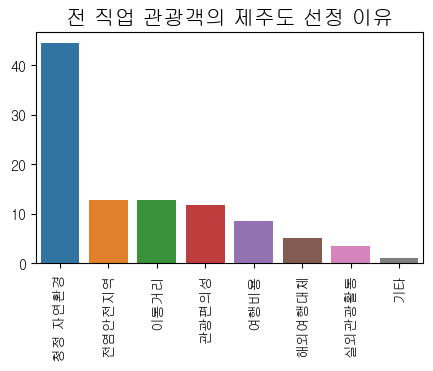

In [ ]:
plt.figure(figsize = (5, 3))
sns.barplot(data=df_reason_age_div ,errorbar=None)
plt.title('전 직업 관광객의 제주도 선정 이유', size=15)
plt.xticks(rotation=90)
plt.show()

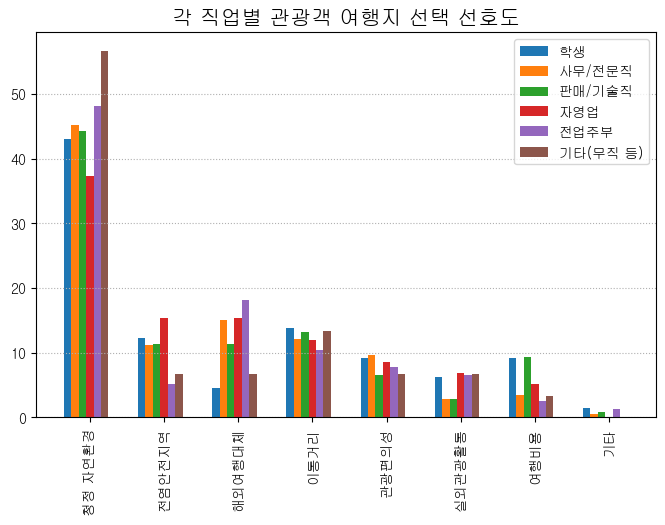

In [ ]:
w = 0.1
nrow = df_reason_job_trans.shape[0]
idx = np.arange(nrow)
idx

plt.figure(figsize = (8, 5))
plt.bar(idx - 3 * w, df_reason_job_trans['학생'], width=w, label='학생')
plt.bar(idx - 2 * w, df_reason_job_trans['사무/전문직'], width=w, label='사무/전문직')
plt.bar(idx - w, df_reason_job_trans['판매/기술직'], width=w, label='판매/기술직')
plt.bar(idx ,df_reason_job_trans['자영업'], width=w, label='자영업')
plt.bar(idx + w ,df_reason_job_trans['전업주부'], width=w, label='전업주부')
plt.bar(idx + 2 * w, df_reason_job_trans['기타(무직 등)'], width=w, label='기타(무직 등)')
plt.title('각 직업별 관광객 여행지 선택 선호도', size=15)
plt.xticks(idx, df_reason_job_trans['제주도 선정 이유'],rotation=90)
plt.legend()
plt.grid(axis='y', ls=':')
plt.show()

* 1순위 이유에서 기타(무직 등)이 가장 압도적인 데이터를 보여주고 있다.